<a href="https://colab.research.google.com/github/DarshanSuresh/Data-Mining/blob/main/Iris_Advance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['species'])
print(iris_df.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [ ]:
# 1. Data Summary
print("Data Summary:")
print(iris_df.groupby('species').describe())


Data Summary:
        sepal length (cm)                                              \
                    count   mean       std  min    25%  50%  75%  max   
species                                                                 
0.0                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1.0                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2.0                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

        sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                   count   mean  ...               75%  max            count   
species                          ...                                           
0.0                 50.0  3.428  ...             1.575  1.9             50.0   
1.0                 50.0  2.770  ...             4.600  5.1             50.0   
2.0                 50.0  2.974  ...             5.875  6.9             50.0   

                                                   
          mean

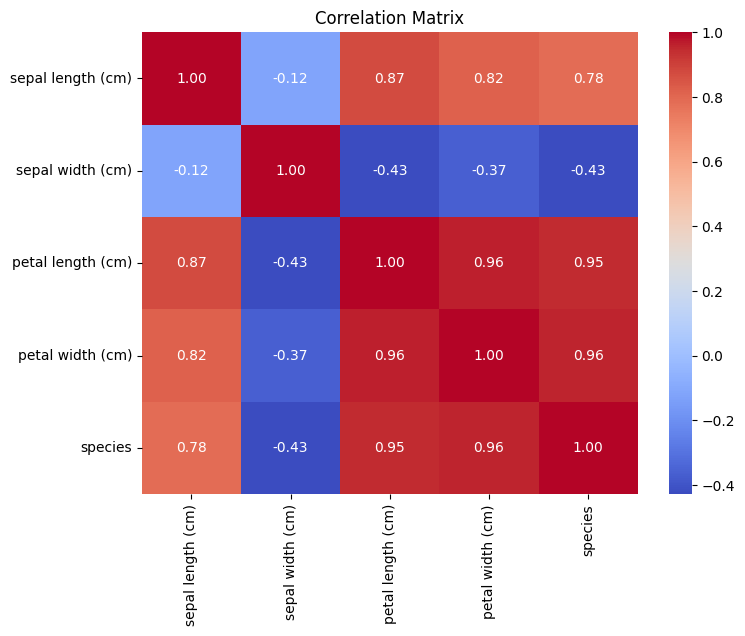

In [ ]:
# 2. Correlation Analysis
correlation_matrix = iris_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


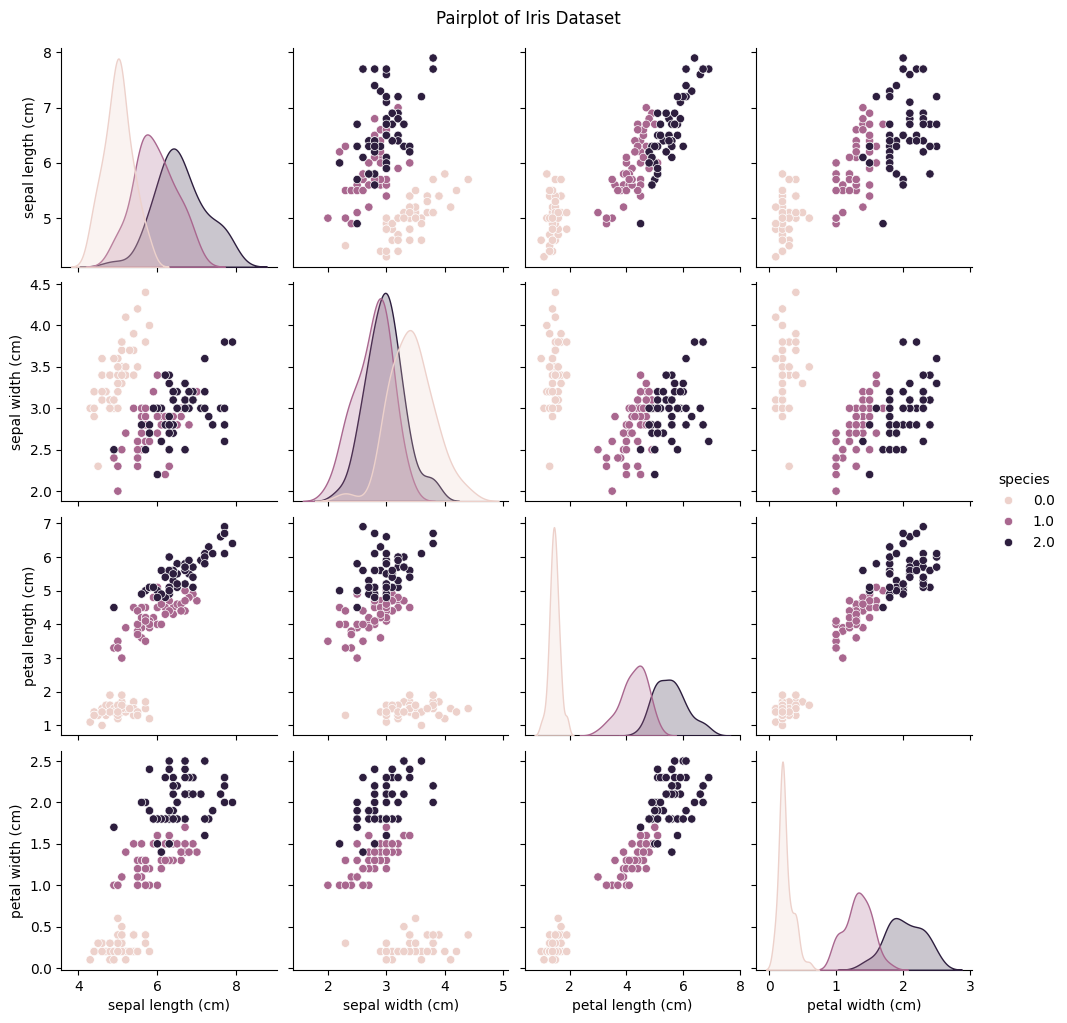

In [ ]:
# 3. Feature Relationships
sns.pairplot(iris_df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


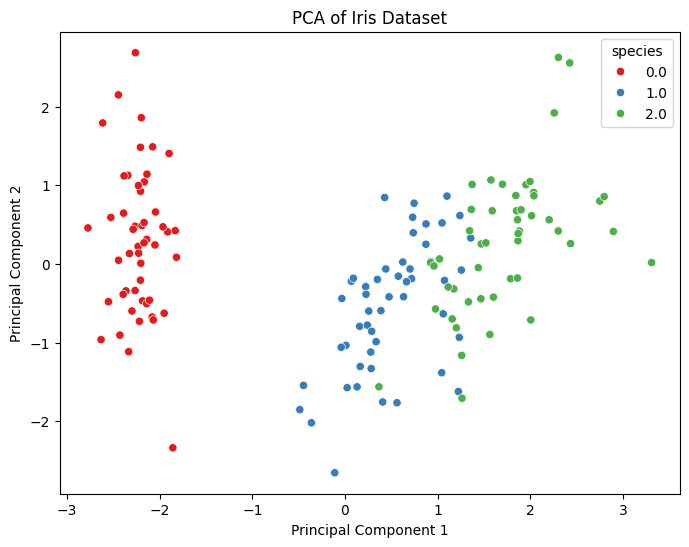

In [ ]:
# 4. Dimensionality Reduction
X = iris_df.drop('species', axis=1)
y = iris_df['species']
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


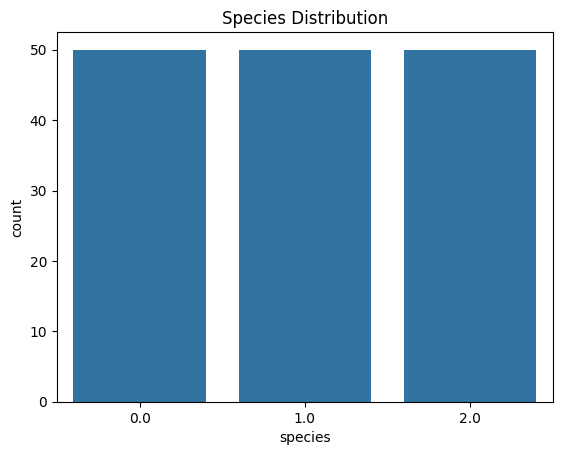

In [ ]:
# 5. Species Distribution
sns.countplot(x='species', data=iris_df)
plt.title("Species Distribution")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# 6. Outlier Detection
def detect_outliers(df, features):
    outliers = []
    for feature in features:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outliers.extend(outlier_list_col)
    outliers = list(set(outliers))
    return outliers

outliers_indices = detect_outliers(iris_df, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
print("Outliers:", iris_df.loc[outliers_indices])


Outliers:     sepal_length  sepal_width  petal_length  petal_width  species
32           5.2          4.1           1.5          0.1      0.0
33           5.5          4.2           1.4          0.2      0.0
60           5.0          2.0           3.5          1.0      1.0
15           5.7          4.4           1.5          0.4      0.0


In [ ]:
# 7. Model Building
X_without_outliers = X.drop(outliers_indices)
y_without_outliers = y.drop(outliers_indices)

X_train, X_test, y_train, y_test = train_test_split(X_without_outliers, y_without_outliers, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# 8. Model Evaluation
y_pred = rf_classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       0.88      0.88      0.88         8
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
